## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

## Load Ames Train Dataset

In [2]:
#importing the train Ames data labelign it as Train_Ames
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")

# Clean the Data and EDA

In [3]:
#Looking through the data to see what columns we have for the train model
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#looking at all variables to see where to start
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
# The training data and test data have the same column minus the SalesPrice
missing_column = set(train.columns)-set(test.columns)
missing_column

{'SalePrice'}

In [6]:
#checking the data set for null values 
train.isnull().sum().sort_values(ascending=True)

Id                    0
Sale Type             0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Foundation            0
Kitchen Qual          0
Functional            0
Fireplaces            0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
TotRms AbvGrd         0
Exter Cond            0
Heating               0
                   ... 
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Overall Cond          0
BsmtFin SF 1          1
Total Bsmt SF         1
BsmtFin SF 2          1
Bsmt Unf SF           1
Garage Area           1
Garage Cars           1
Bsmt Full Bath  

In [7]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## Break Up the DataFrame to be more Manageable. 
Category into more manageable size, numerical and descriptive information

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

### Cleaning Functions: 

In [8]:
# Change the NaNs in one column specifically 

def fill_na_value_column(df, column, val):
    count = df[column].isnull().sum()
    df[column] = df[column].fillna(val)
    print("filled \"{}\" column value from Na to {}, removing {} null values".format(column, val, count))
    return

In [9]:
#This function will fill in NaNs for all columns in a specific group p
def fill_na_values_all(df, feature_group, value_fill):
    for feature in feature_group:
        df[feature] = df[feature].fillna(value_fill)
    return

In [10]:
#This will see if there are missing values from a column other than Nan

def check_data(df):
    s = df.shape
    print("Rows: {} Cols: {}".format(s[0],s[1]))

    # Check for null values
    null_data = df.isnull().sum()
    null_data_count = sum(df.isnull().sum())
    if  null_data_count > 0:
        print("There are {} null data.".format(null_data_count))
        print("Columns with NaN: {}".format(list(null_data[null_data > 0].index)))

    check_cols(df)

    return



### Numerical Features

In [11]:
#Break up the list to numerical features and categorical features to clean up, also droping where columns with NaN values
# NaN values in columsn that have column. 

# We will be referencing the column names of the train data because it has all the column names in it. 
numerical_features = list(train._get_numeric_data().drop(["Id", "PID", "SalePrice"], axis=1).columns)

Fill in the NaN values with numerical values. Based on the Data provided. Below are the ony nummerical with NaN values. Double checked the data set and determine these two columns would not be included because of NaN values and dropped from our search values.

- Lot Frontage        330
- Garage Yr Blt       114


In [12]:
train[numerical_features].isnull().sum().sort_values(ascending=False)


Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
Overall Cond         0
Year Built           0
Year Remod/Add       0
Overall Qual         0
Gr Liv Area          0
Lot Area             0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Yr Sold              0
Mo Sold              0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
MS SubClass          0
dtype: int64

In [13]:
# We know from the data set that the NaN values for Mas Vnr Area correlates to no veneer, and thus no veneer square space, so it can be cause to 0. 

fill_na_value_column(train, "Mas Vnr Area", 0)
fill_na_value_column(test, "Mas Vnr Area", 0)

filled "Mas Vnr Area" column value from Na to 0, removing 22 null values
filled "Mas Vnr Area" column value from Na to 0, removing 1 null values


In [14]:
train[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 36 columns):
MS SubClass        2051 non-null int64
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Mas Vnr Area       2051 non-null float64
BsmtFin SF 1       2050 non-null float64
BsmtFin SF 2       2050 non-null float64
Bsmt Unf SF        2050 non-null float64
Total Bsmt SF      2050 non-null float64
1st Flr SF         2051 non-null int64
2nd Flr SF         2051 non-null int64
Low Qual Fin SF    2051 non-null int64
Gr Liv Area        2051 non-null int64
Bsmt Full Bath     2049 non-null float64
Bsmt Half Bath     2049 non-null float64
Full Bath          2051 non-null int64
Half Bath          2051 non-null int64
Bedroom AbvGr      2051 non-null int64
Kitchen AbvGr      2051 non-null int64
TotRms AbvGrd      

In [15]:
#drop all remaining NaN values to zero since the remaining category where one is the same the value equivalent to NaN 
fill_na_values_all(train, numerical_features, 0)
fill_na_values_all(test, numerical_features, 0)

In [16]:
train[numerical_features].isnull().sum()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

#### After cleaning all the NaNs and values, we can break the numerical column into values that we are looking for 

In [17]:
# After reviewing the numerical features, we have to make sure that the ones that are continuous or numerical are labelled appropriately and divided up to respective columns
nonnumerical_house_features = ["MS SubClass", 
                            "Year Built", 
                            "Year Remod/Add", 
                            "Garage Yr Blt",
                            "Mo Sold",
                            "Yr Sold" ]
outside_numerical_house_features = ["Lot Frontage",
                                   "Wood Deck SF",
                                   "Pool Area",
                                    "Lot Area"]

# create a list of column name for list of numerical_house features that we can use to extrapilate data. 
inside_numerical_house_features = list((set(numerical_features) - set(nonnumerical_house_features)) - set(outside_numerical_house_features))      

### Descriptive Features

In [18]:
#creating a column that can be called that is just descriptive features
descriptive_columns = list(train.select_dtypes(include=["object"]).columns)

In [19]:
train[descriptive_columns].isnull().sum().sort_values(ascending=False).head(20)
                                                                            

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Condition 1          0
Neighborhood         0
Condition 2          0
Bldg Type            0
Sale Type            0
dtype: int64

In [20]:
# We can take out the NaN Values that are over 1000 examining both categories to see if it would be relevant to the data set with all Null values
descriptive_columns =  list(train[descriptive_columns].drop(["Bsmt Qual", "Bsmt Exposure", "Misc Feature"], axis=1).columns)

In [21]:
train[descriptive_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
MS Zoning         2051 non-null object
Street            2051 non-null object
Alley             140 non-null object
Lot Shape         2051 non-null object
Land Contour      2051 non-null object
Utilities         2051 non-null object
Lot Config        2051 non-null object
Land Slope        2051 non-null object
Neighborhood      2051 non-null object
Condition 1       2051 non-null object
Condition 2       2051 non-null object
Bldg Type         2051 non-null object
House Style       2051 non-null object
Roof Style        2051 non-null object
Roof Matl         2051 non-null object
Exterior 1st      2051 non-null object
Exterior 2nd      2051 non-null object
Mas Vnr Type      2029 non-null object
Exter Qual        2051 non-null object
Exter Cond        2051 non-null object
Foundation        2051 non-null object
Bsmt Cond         1996 non-null object
BsmtFin Type 1    1996 non-null obje

Reviewed the Null values and there corresponding descriptive means. 
    - Took out BSMT Qual because a similar metric Bsmt Cond was appropriate enough
    - Bsmt Exposure does not provide a conversion between no exposure and no basement with both can exist at once
    - Misc feature was taken out just because why? is this even in here???

In [22]:
#Fill in NaN values as well ensuring that all descriptive columns for train and test line up for when we create dummies. 
# Columns with none filled so that it can be convereted to value with dumm variables. 
for col in descriptive_columns:
    train[col] = train[col].fillna("N/A")
    test[col] = test[col].fillna("N/A")
    train_values = sorted(list(train[col].unique()))
    test_values = sorted(list(train[col].unique()))
    categories = set(train_values + test_values)
    
    train[col] = pd.Categorical(train[col], categories = categories)
    test[col] = pd.Categorical(test[col], categories = categories)

#### Now that we have cleaned all the descriptive data for the cleaning we can put together the numerical housing data that is actually a categorical or descriptive feature

In [23]:
descriptive_columns.extend(nonnumerical_house_features)

In [24]:
train[descriptive_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 45 columns):
MS Zoning         2051 non-null category
Street            2051 non-null category
Alley             2051 non-null category
Lot Shape         2051 non-null category
Land Contour      2051 non-null category
Utilities         2051 non-null category
Lot Config        2051 non-null category
Land Slope        2051 non-null category
Neighborhood      2051 non-null category
Condition 1       2051 non-null category
Condition 2       2051 non-null category
Bldg Type         2051 non-null category
House Style       2051 non-null category
Roof Style        2051 non-null category
Roof Matl         2051 non-null category
Exterior 1st      2051 non-null category
Exterior 2nd      2051 non-null category
Mas Vnr Type      2051 non-null category
Exter Qual        2051 non-null category
Exter Cond        2051 non-null category
Foundation        2051 non-null category
Bsmt Cond         2051 non-null 

### Break down the columns into manageable lists before the get dummies part 

In [25]:
cat_inhouse_features = ['Exterior 1st',
                        'Exterior 2nd',
                        'Mas Vnr Type',
                        'Exter Qual',
                        'Exter Cond',
                        'Bsmt Cond',
                        'BsmtFin Type 1',
                        'BsmtFin Type 2',
                        'Functional',
                        'Fireplace Qu',
                        'MS SubClass']

cat_location_features = ['MS Zoning',
                         'Street',
                         'Alley',
                         'Lot Shape',
                         'Land Contour',
                         'Lot Config',
                         'Land Slope',
                         'Neighborhood', 
                         'Condition 1',
                         'Condition 2']

cat_outhouse_features = ['Bldg Type',
                        'House Style',
                        'Roof Style',
                        'Roof Matl',
                        'Foundation',
                        'Garage Type',
                        'Garage Finish',
                        'Garage Qual',
                        'Garage Cond',
                        'Paved Drive',
                        'Pool QC',
                        'Fence']

cat_utilities_features = ['Utilities',
                          'Heating',
                          'Heating QC',
                          'Central Air',
                          'Electrical']

In [26]:
#Convert the Descriptive features into numerical values that we can work with 
# converting dummies based on the features listed. 

cat_inhouse_features_dummies = pd.get_dummies(train[cat_inhouse_features])
cat_location_features_dummies = pd.get_dummies(train[cat_location_features])
cat_outhouse_features_dummies = pd.get_dummies(train[cat_outhouse_features])
cat_utilities_features_dummies = pd.get_dummies(train[cat_utilities_features])
cat_time_features_dummies = pd.get_dummies(train[nonnumerical_house_features])

Now that we have made get dummies per house features we can pull the entire list through a list function of column

In [27]:
cat_inhouse_features_dummies_list = list(cat_inhouse_features_dummies.columns)
cat_location_features_dummies_list =  list(cat_location_features_dummies.columns)
cat_outhouse_features_dummies_list =  list(cat_outhouse_features_dummies.columns)
cat_utilities_features_dummies_list=  list(cat_utilities_features_dummies.columns)
cat_time_features_dummies_list =  list(cat_time_features_dummies.columns)

In [28]:
test_dummies = pd.get_dummies(test[descriptive_columns])

In [29]:
train_dummies = pd.get_dummies(train[descriptive_columns])

## Merge the Two Features together and Sales Price Category back for Train

In [30]:
train_1 = pd.concat([train_dummies, train[numerical_features], train["SalePrice"]], axis=1)
test_1 = pd.concat([test_dummies, test[numerical_features]], axis=1)

## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

List of All list of Categories for reference 

- inside_numerical_house_features
- outside_numerical_house_features
- cat_inhouse_features_dummies
- cat_location_features_dummies
- cat_outhouse_features_dummies
- cat_utilities_features_dummies
- cat_time_features_dummies 

Box Plot of our key feature sale price to get a good idea of whats going on

C:\Users\Trisarah\Anaconda3\envs\dsi\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


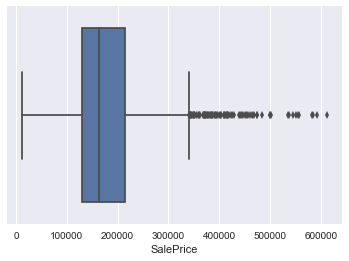

In [31]:
sns.boxplot(train_1["SalePrice"])

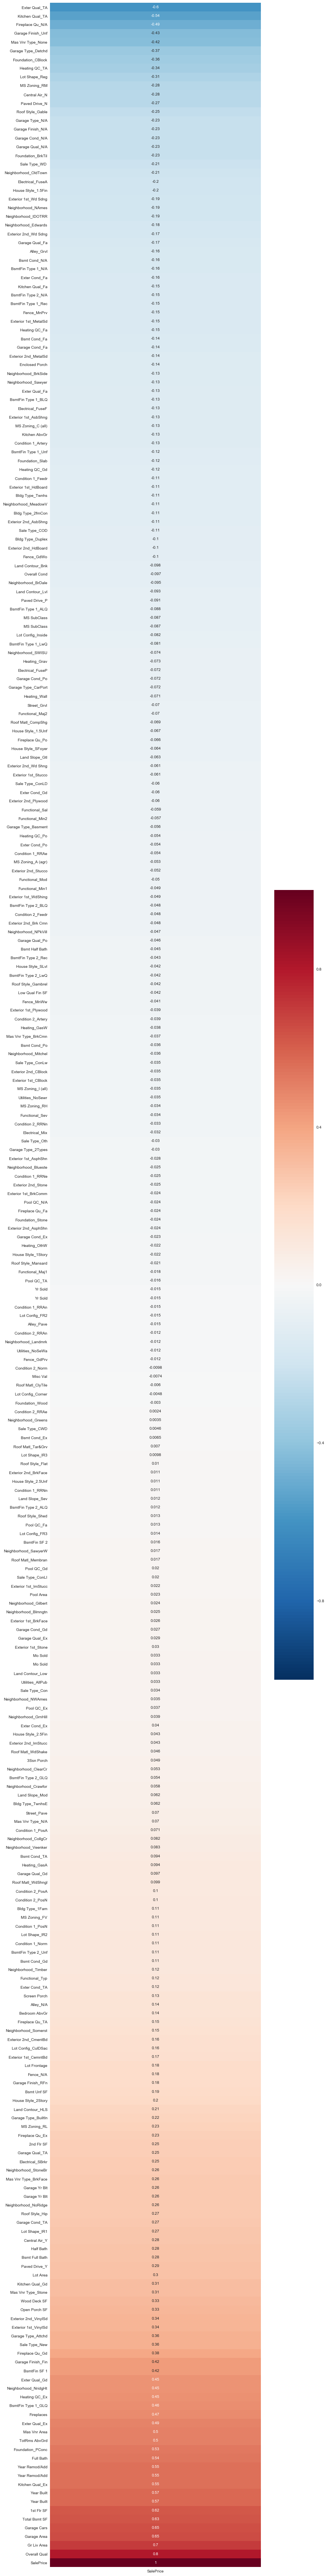

In [32]:
### Find the top Correlation with Sales Price to map out
plt.figure(figsize=(12,120))
sns.heatmap(train_1.corr()[["SalePrice"]].sort_values("SalePrice"), annot=True)

In [33]:
top_20_corr = list(train_1.corr()["SalePrice"].sort_values(ascending=False).index[1:21])

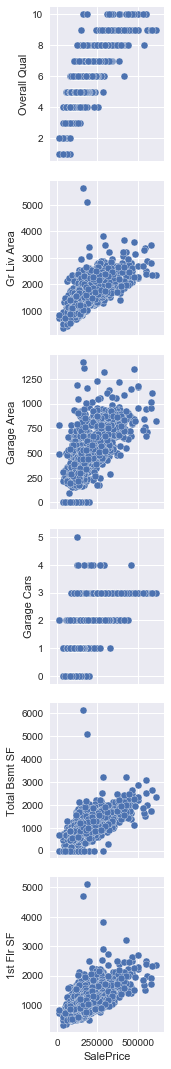

In [34]:
#From our Top 5, I am just plotting the top 5
sns.pairplot(train_1, x_vars=["SalePrice"], y_vars=['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF'])

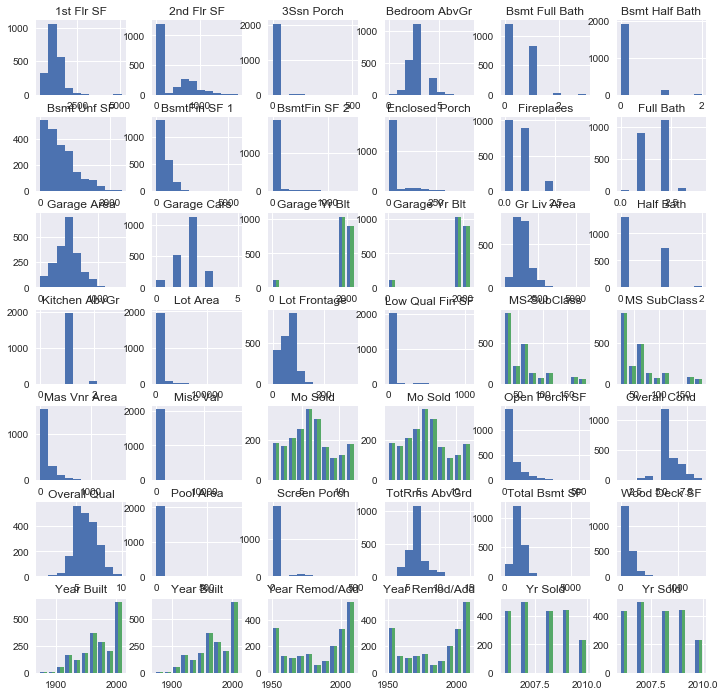

In [35]:
train_1[numerical_features].hist(figsize=(12,12));

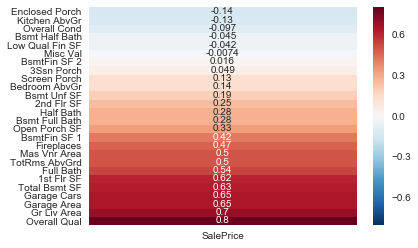

In [36]:
# Lets find the numerical correlations to price for all major categories
corr_INHF = train_1.corr().loc[inside_numerical_house_features, "SalePrice"]
sns.heatmap(corr_INHF.to_frame()[["SalePrice"]].sort_values("SalePrice"), annot=True)

## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

In [37]:
def model_selection(df, features, y):
    X = df[features]
    y = df[y]
    # Test/train split of "full training" data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

    # Set up the Pipline based on input arguments
    ss =  StandardScaler()
    lr = LinearRegression()
    rcv = RidgeCV()
    lcv =  LassoCV()
    ecv = ElasticNetCV()
    
    ss = StandardScaler()

# you want the data that is being trained to be focused on the training data
# you don't want to scale your target and just features so that we can see the correlation in relation to the target.
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    lr_cross_val = cross_val_score(lr, X_train_sc, y_train, cv=3).mean()
    lcv_cross_val = cross_val_score(lcv, X_train_sc, y_train, cv=3).mean()
    rcv_cross_val = cross_val_score(rcv, X_train_sc, y_train, cv=3).mean()
    ecv_cross_val = cross_val_score(ecv, X_train_sc, y_train, cv=3).mean()
    
    print("Linear Regression Score: ", lr_cross_val)
    print("RidgeCV Score: ", rcv_cross_val)
    print("LassCV Score: ", lcv_cross_val)
    print("ElasticNetCV Score: ", ecv_cross_val)

### Feature Test:

In [38]:
model_selection(train_1, top_20_corr, "SalePrice")

Linear Regression Score:  0.7828675726609701
RidgeCV Score:  0.7844619180000993
LassCV Score:  0.7863301696850801
ElasticNetCV Score:  0.19261719906680652


In [39]:
model_selection(train_1, inside_numerical_house_features, "SalePrice")

Linear Regression Score:  0.7500909189446548
RidgeCV Score:  0.7515849504447694
LassCV Score:  0.7509468036139747
ElasticNetCV Score:  0.1202834392301703


In [40]:
model_selection(train_1, outside_numerical_house_features, "SalePrice")

Linear Regression Score:  0.1875564726234896
RidgeCV Score:  0.18801835661849267
LassCV Score:  0.18958442054111668
ElasticNetCV Score:  0.016252897260074617


In [41]:
model_selection(train_1, cat_inhouse_features_dummies_list, "SalePrice")

Linear Regression Score:  -1.5439835510683107e+26
RidgeCV Score:  0.65398741053605
LassCV Score:  0.6574923514911343
ElasticNetCV Score:  0.09291467095470811


In [42]:
model_selection(train_1, cat_location_features_dummies_list, "SalePrice")

Linear Regression Score:  -1.0476447059267859e+26
RidgeCV Score:  0.587001569727484
LassCV Score:  0.5869865285387269
ElasticNetCV Score:  0.05705942983752136


In [43]:
model_selection(train_1, cat_outhouse_features_dummies_list, "SalePrice")

Linear Regression Score:  -1.3471145562995322e+26
RidgeCV Score:  0.48592746757246247
LassCV Score:  0.48828406124605545
ElasticNetCV Score:  0.08348672677448998


In [44]:
model_selection(train_1, cat_utilities_features_dummies_list, "SalePrice")

Linear Regression Score:  -9.820445902948728e+26
RidgeCV Score:  0.2608465762287403
LassCV Score:  0.26228488354124624
ElasticNetCV Score:  0.03080545162085387


In [45]:
model_selection(train_1, cat_time_features_dummies_list, "SalePrice")

Linear Regression Score:  0.4013510858344704
RidgeCV Score:  0.4013657901250216
LassCV Score:  0.40134675730660074
ElasticNetCV Score:  0.05462311228575123


In [46]:
# Trying a few different combinations
#Definitely want to keep the numerical features of the house add location
#2 feature combo
location_house = cat_location_features_dummies_list + inside_numerical_house_features
location_allhouse = cat_location_features_dummies_list + inside_numerical_house_features + outside_numerical_house_features
location_in_out_all = cat_location_features_dummies_list + inside_numerical_house_features + cat_inhouse_features_dummies_list

In [47]:
model_selection(train_1, location_house, "SalePrice")

Linear Regression Score:  -6.131022467999504e+25
RidgeCV Score:  0.7956540152228099
LassCV Score:  0.8014364969540511
ElasticNetCV Score:  0.14758716889921228


In [48]:
model_selection(train_1, location_allhouse, "SalePrice")

Linear Regression Score:  -3.4492894988612025e+25
RidgeCV Score:  0.7880352023746934
LassCV Score:  0.7933666361159358
ElasticNetCV Score:  0.15295912099170675


In [49]:
model_selection(train_1, location_in_out_all, "SalePrice")

Linear Regression Score:  -1.1505522080379639e+26
RidgeCV Score:  0.7782972655459103
LassCV Score:  0.8091225122725149
ElasticNetCV Score:  0.20259190212234368


### Basline Model Check

In [50]:
train["SalePrice"].value_counts(ascending=False, normalize=True)

130000    0.012189
140000    0.010726
145000    0.009751
135000    0.009264
160000    0.007801
128000    0.007801
170000    0.007801
155000    0.007314
120000    0.007314
190000    0.006826
165000    0.006338
147000    0.006338
125000    0.006338
200000    0.006338
127000    0.005851
173000    0.005851
143000    0.005851
105000    0.005851
150000    0.005851
185000    0.005851
144000    0.005363
119000    0.005363
225000    0.005363
139000    0.005363
215000    0.005363
132000    0.004876
141000    0.004876
127500    0.004876
115000    0.004876
180000    0.004876
            ...   
35000     0.000488
116900    0.000488
215200    0.000488
159895    0.000488
202900    0.000488
194700    0.000488
293000    0.000488
200825    0.000488
195400    0.000488
174190    0.000488
149700    0.000488
375000    0.000488
199000    0.000488
139400    0.000488
293200    0.000488
264500    0.000488
153900    0.000488
332200    0.000488
57625     0.000488
223500    0.000488
112900    0.000488
178400    0.

## Model Data

## Modeling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.


In [56]:

X = train_1[location_in_out_all]
y = train_1["SalePrice"]
# Set up the Pipline based on input arguments
ss =  StandardScaler()
lr = LinearRegression()
rcv = RidgeCV()
lcv = LassoCV()
ecv = ElasticNetCV()

ss = StandardScaler()
X_train_sc = ss.fit_transform(X)
X_test_sc = ss.transform(test_1[location_in_out_all])
# Fit the pipline to the training data
lcv.fit(X_train_sc, y)
train_score = lcv.score(X_train_sc, y)

# Score the pipeline model on the test set
pred = lcv.predict(test_1[location_in_out_all])

print("   Train: {}".format(train_score ))

   Train: 0.8884427367910197


In [59]:
test["SalePrice"]= pred

## Export File to Kaggle

In [60]:
test[["Id", "SalePrice"]].to_csv("./datasets/submission4.csv", index=False)